<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/BuildClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/sample_data/data_banknote_authentication.csv')
color=[]
value='green'
value2='red'
for i in range(len(df)):
    if df['class'][i] == 0:
      color.append(value)
    elif df['class'][i] == 1:
        color.append(value2)
print(color)
df["color"]= color
df

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 

variance  skewness  curtosis  entropy  class  color
0      3.62160   8.66610   -2.8073 -0.44699      0  green
1      4.54590   8.16740   -2.4586 -1.46210      0  green
2      3.86600  -2.63830    1.9242  0.10645      0  green
3      3.45660   9.52280   -4.0112 -3.59440      0  green
4      0.32924  -4.45520    4.5718 -0.98880      0  green
...        ...       ...       ...      ...    ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1    red
1368  -1.38870  -4.87730    6.4774  0.34179      1    red
1369  -3.75030 -13.45860   17.5932 -2.77710      1    red
1370  -3.56370  -8.38270   12.3930 -1.28230      1    red
1371  -2.54190  -0.65804    2.6842  1.19520      1    red

[1372 rows x 6 columns]

In [6]:
#for each class and for each feature f1; f2; f3; f4, compute its #mean () and standard deviation (). 
#Round the results to 2 decimal
for i in df.columns[ :4]:
  mean=round(df.groupby('class')[i].mean(), 2)
  St_dev= round(df.groupby('class')[i].std(), 2)
  print("STANDARD DEVIATION",St_dev)
  print('MEAN', mean)

#Maximum likelihood estimation (MLE) is a technique used for estimating the parameters of a given distribution, using some observed data.

#normal distribution-symmertric(#days w/ postive and negative days will be the same)

#confusion metrix- accuracy btw positive and negative labels

#Gradient descent- to find the best parameters that minimize the model's cost function

STANDARD DEVIATION class
0    2.02
1    1.88
Name: variance, dtype: float64
MEAN class
0    2.28
1   -1.87
Name: variance, dtype: float64
STANDARD DEVIATION class
0    5.14
1    5.40
Name: skewness, dtype: float64
MEAN class
0    4.26
1   -0.99
Name: skewness, dtype: float64
STANDARD DEVIATION class
0    3.24
1    5.26
Name: curtosis, dtype: float64
MEAN class
0    0.80
1    2.15
Name: curtosis, dtype: float64
STANDARD DEVIATION class
0    2.13
1    2.07
Name: entropy, dtype: float64
MEAN class
0   -1.15
1   -1.25
Name: entropy, dtype: float64


In [7]:
for i in df.columns[ :4]:
  mean=round(df[i].mean(), 2)
  St_dev= round(df[i].std(), 2)
  print("STANDARD DEVIATION",St_dev)
  print('MEAN', mean)

STANDARD DEVIATION 2.84
MEAN 0.43
STANDARD DEVIATION 5.87
MEAN 1.92
STANDARD DEVIATION 4.31
MEAN 1.4
STANDARD DEVIATION 2.1
MEAN -1.19


In [ ]:
#from IPython import display
#display.Image("X.jpg")

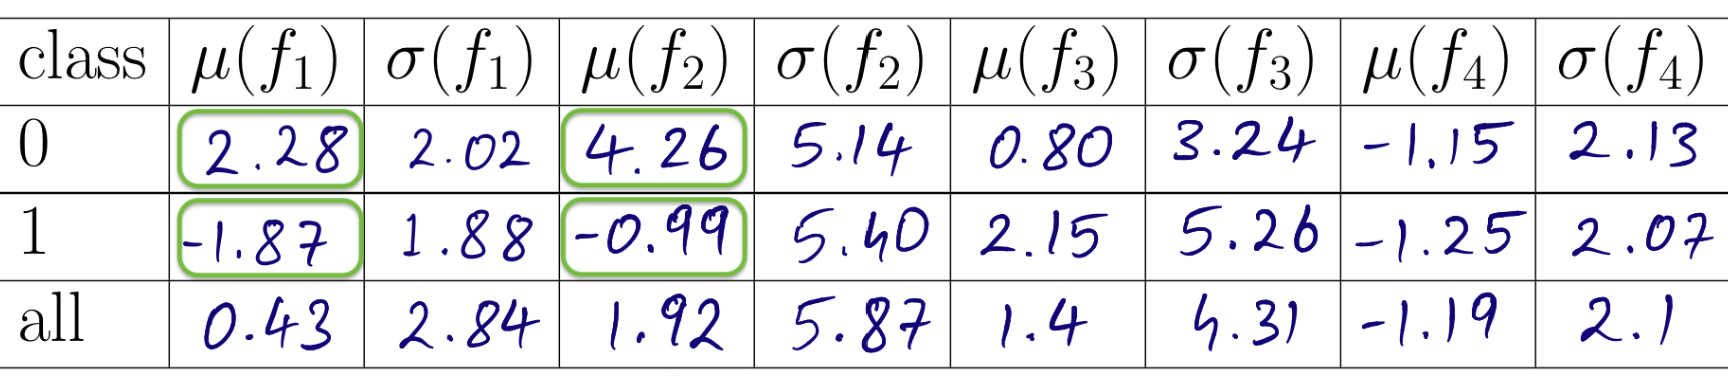

Examining the tabel for any obvious patterns in the distribution of banknotes in each class:

Mean of f1 and f2 are higher for class-0 than class-1. 
Mean of3 for class-1 > than class-0

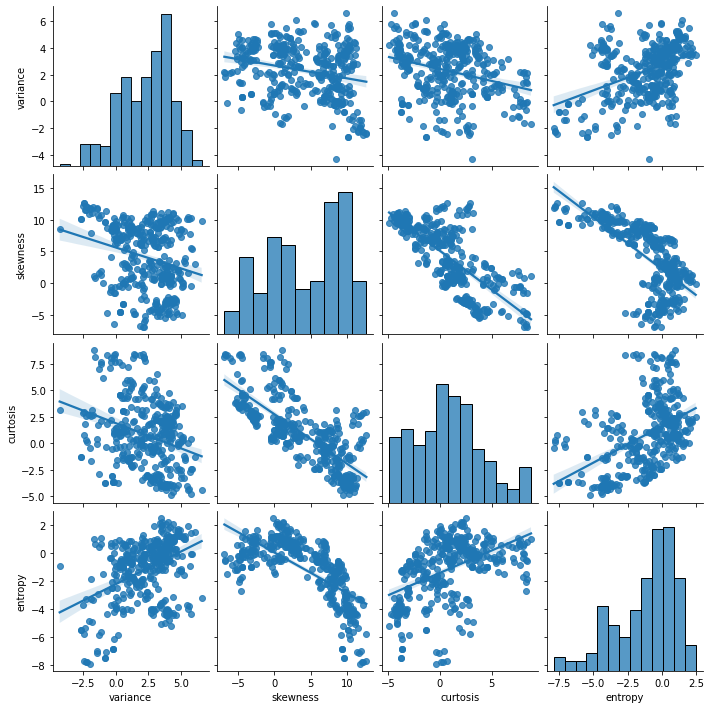

In [8]:
#split into Xtrain and Xtesting parts (50/50 split).
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.5)
# print(df_train)

#plot pairwise relationships in Xtrain separately for class 0 and class 1.
good_train= df_train[df_train.columns[ :4]][df_train['class'] == 0]
fake_train=df_train[df_train.columns[ :4]][df_train['class'] == 1]

sb.pairplot(good_train, kind="reg")
plt.show()

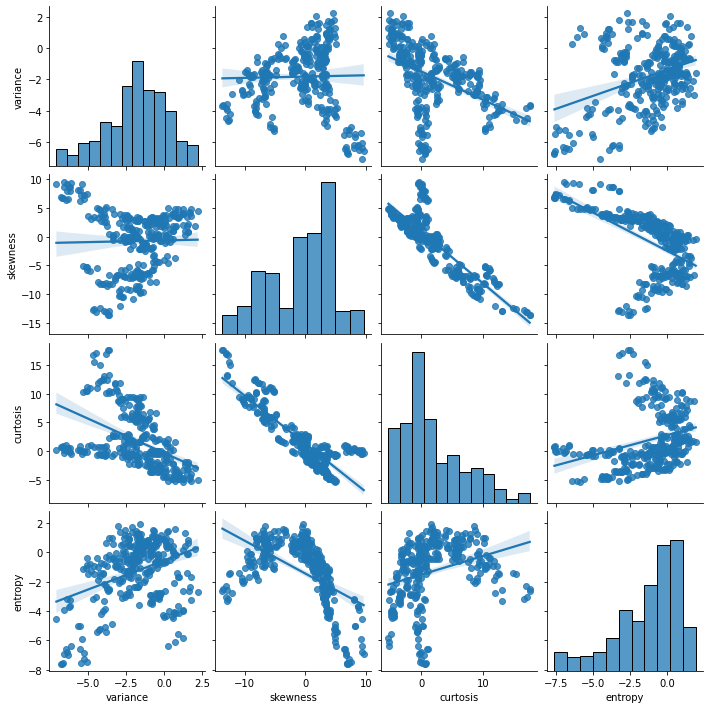

In [ ]:
sb.pairplot(fake_train, kind="reg")
plt.show()

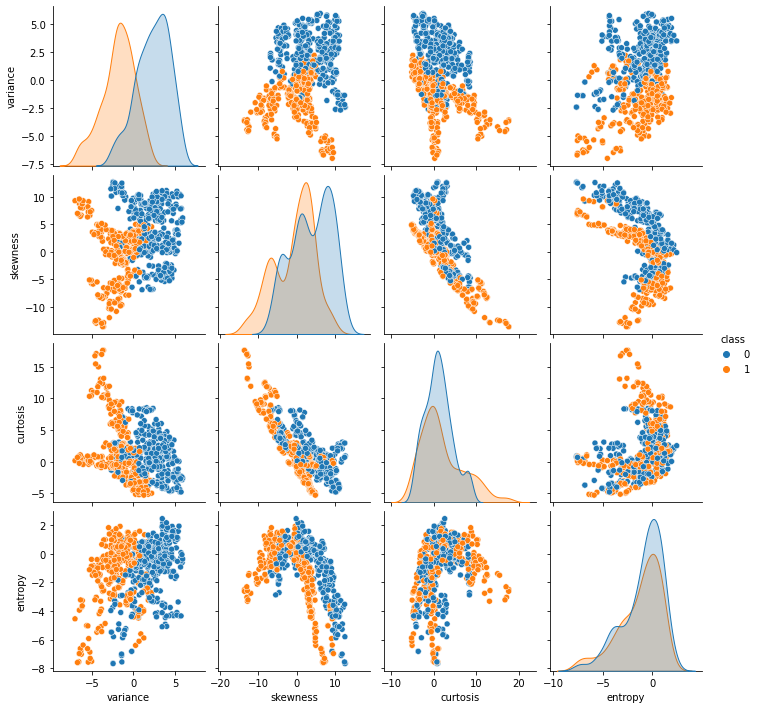

In [ ]:
sb.pairplot(df_train, hue="class")
plt.show()

After examining results->three simple comparisons that can be sufficient to detect a fake bill.¶
Classification Rules based on visual examination:
if (variance > 0) and (skewness > 3): x = good else: x = fake

In [16]:
#apply simple classier to Xtest and compute predicted class labels
df_train['predict'] = np.where(((df_train['variance']> 0) | (df_train['skewness']> 3)), 'green', 'red')
df_train

variance   skewness  curtosis  entropy  class  color predict
81     4.46820   2.290700   0.95766  0.83058      0  green   green
209    2.17210  -0.738740   5.46720 -0.72371      0  green   green
974   -5.03010   7.503200  -0.13396 -7.50340      1    red   green
293    1.93400  -0.000009   4.81600 -0.33967      0  green   green
104    4.20270   0.227610   0.96108  0.97282      0  green   green
...        ...        ...       ...      ...    ...    ...     ...
898   -5.24060   6.625800  -0.19908 -6.86070      1    red   green
213    0.68087   2.325900   4.90850  0.54998      0  green   green
227   -2.64790  10.137400  -1.33100 -5.47070      0  green   green
421   -1.14970   1.295400   7.70100  0.62627      0  green     red
1282  -1.99830  -6.607200   4.82540 -0.41984      1    red     red

[686 rows x 7 columns]

In [17]:
df_test['predict'] = np.where(((df_test['variance']> 0) | (df_test['skewness']> 3)), 'green', 'red')
df_test

variance   skewness  curtosis   entropy  class  color predict
1121  -4.67650  -5.663600  10.96900 -0.334490      1    red     red
517    1.76200   4.368200   2.13840  0.754290      0  green   green
1113  -2.68640  -0.097265   0.61663  0.061192      1    red     red
350   -1.25280  10.203600   2.17870 -5.603800      0  green   green
251    0.57461  10.110500  -1.69170 -4.392200      0  green   green
...        ...        ...       ...       ...    ...    ...     ...
444    1.33490   6.118900   0.46497  0.498260      0  green   green
1266  -1.43770  -1.432000   2.11440  0.420670      1    red     red
1341  -2.26250  -0.099335   2.81270  0.486620      1    red     red
997   -1.42330  -0.989120   2.35860  0.394810      1    red     red
995   -2.12340   1.181500  -0.55552 -0.811650      1    red     red

[686 rows x 7 columns]

compare your predicted class labels with true labels in Xtest,
compute the following:

(a) TP - true positives (your predicted label is + and true
label is +)
(b) FP - false positives (your predicted label is + but true
label is 􀀀
(c) TN - true negativess (your predicted label is 􀀀 and true
label is 􀀀
(d) FN - false negatives (your predicted label is 􀀀 but true
label is +
(e) TPR = TP/(TP + FN) - true positive rate. This is the
fraction of positive labels that your predicted correctly.
This is also called sensitivity, recall or hit rate.
(f) TNR = TN/(TN + FP) - true negative rate. This is the
fraction of negative labels that your predicted correctly.
This is also called specicity or selectivity.



In [21]:
#TP - true positives (your predicted label is + and true label is +)
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(df_test['color'] , df_test['predict'])
print("confusion matrix: considering class-0 as 'Positive' \n",  cf)

tp = cf[0][0]
fn = cf[0][1]
fp = cf[1][0]
tn = cf[1][1]
print("TP=", tp,"    FP=",  fp,"    FN=",  fn,"   TN=",  tn)

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp + tn) / (tp + tn + fp + fn)
print("TPR=", tpr, "    TNR=", tnr, "    ACC=", acc)

confusion matrix: considering class-0 as 'Positive' 
 [[369  11]
 [102 204]]
TP= 369     FP= 102     FN= 11    TN= 204
TPR= 0.9710526315789474     TNR= 0.6666666666666666     ACC= 0.8352769679300291


does you simple classifier gives you higher accuracy on iden- tifying ”fake” bills or ”real” bills” Is your accuracy better than 50% (”coin” flipping)?

Yes,accuracy of my simple classifier is 83% vs. coin flip(50%).